# Plotting ILAMB Data
Generates plots of observational data in ILAMB

In [44]:
import xarray as xr
import fates_calibration_library.ilamb_plotting as plotting
import fates_calibration_library.ilamb_functions as ilamb

In [54]:
obs_dict_file = '/glade/work/afoster/FATES_calibration/observations/ilamb_conversion.cfg'
obs_dict = ilamb.get_conf_dict(obs_dict_file)

In [55]:
# compiled ILAMB observational data
ilamb_obs_file = '/glade/work/afoster/FATES_calibration/observations/all_ILAMB_obs.nc'
ilamb_dat = xr.open_dataset(ilamb_obs_file)

In [58]:
plotvar = 'BIOMASS'
attributes = obs_dict[plotvar]

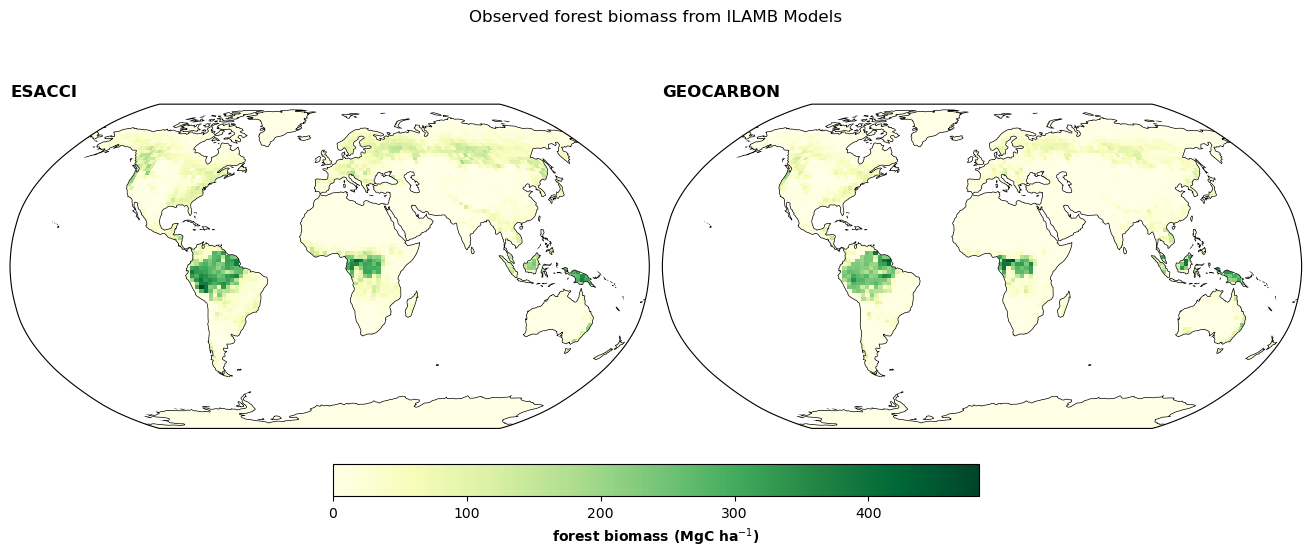

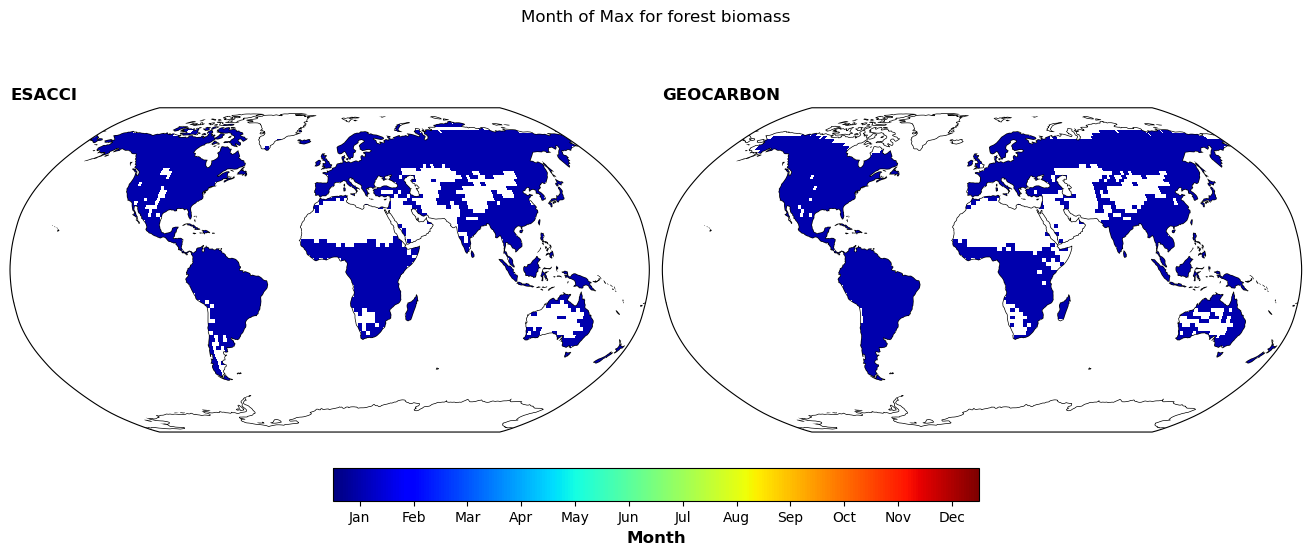

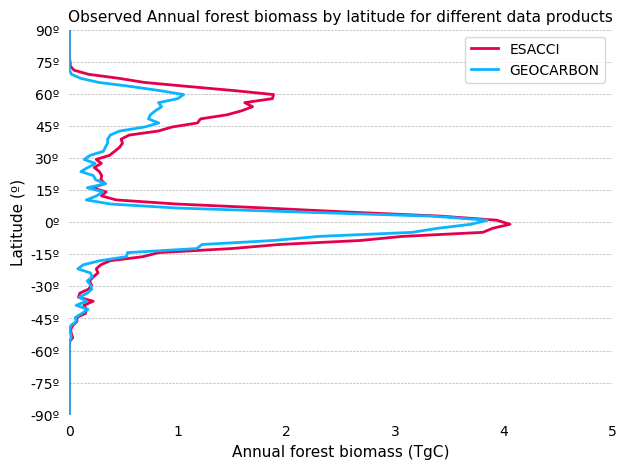

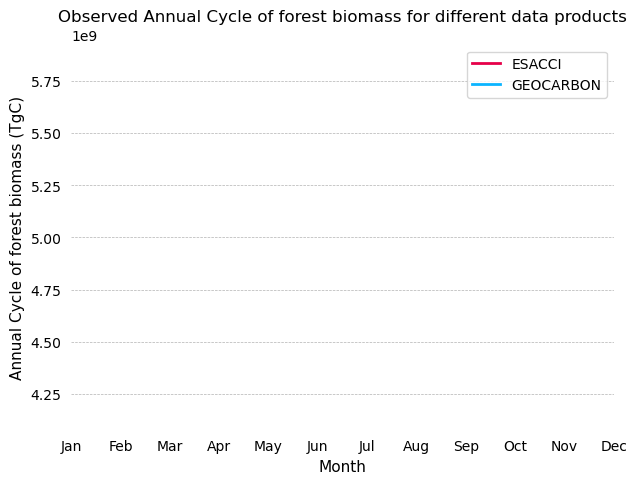

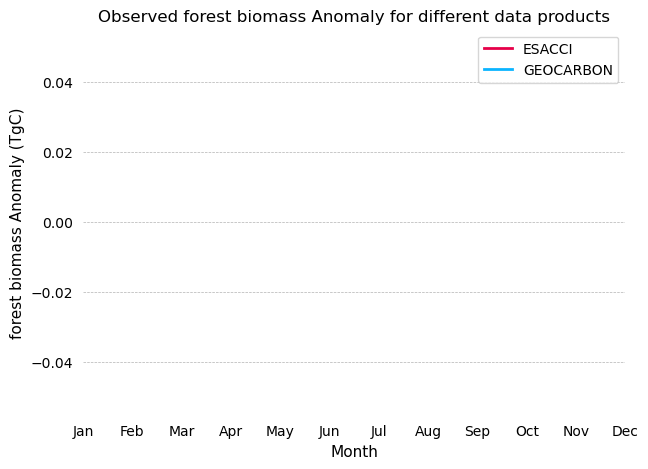

In [59]:
plotting.plot_ilamb_var(ilamb_dat, attributes['var'], obs_dict[plotvar])